Prediction on test data:
 ['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']

Accuraccy Score:
 0.9833333333333333

Visual of ML model created:


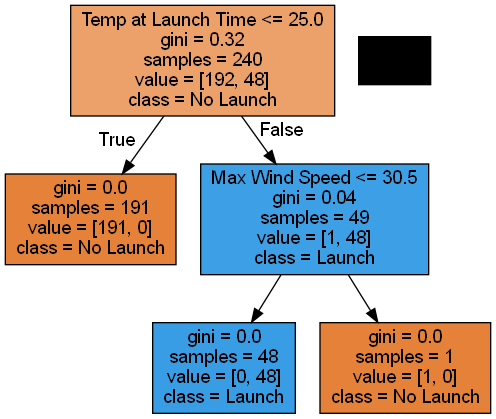

In [3]:
#import libraries
import pandas as pd # import Pandas library for handling tabular data
import numpy as np # import NumPy for handling numerical operations in algebraic order (addition, multiplication, etc.)

# Sklearn library containing all the machine learning packages needed to digest and extract patterns from rocket launch data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build decision tree for ML module
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import preprocessing # Sklearn's preprocessing library used for processing and cleaning the data 

# for visualizing the tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

#open excel file with rocket luanch data
launch_data = pd.read_excel("RocketLaunchDataCompleted.xlsx") #rocket launch data is easliy acsessed using .read_excel() - used to read .xlsx files (excel)
launch_data.head()
launch_data.columns 

#Shows which data is missing in each row
#launch_data.info()

# To handle missing values, fill missing values with appropriate ones (only applies to the three missing data values)
#Uses the fillna() function to fill in info for incomplete data values
#Inplace is set to True in all, meaning the original data is being manipulated
launch_data['Launched?'].fillna('N', inplace = True) #sets launched status to "N" (no)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed', inplace = True) #Assumes Uncrewed as there is no data available
launch_data['Wind Direction'].fillna('unknown', inplace = True) #set wind direction to unknown
launch_data['Condition'].fillna('Fair', inplace = True) #sets condition value as 'fair'
launch_data.fillna(0, inplace = True) 

#Data manipulation
# Converting text data to numerical as computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have text info, so we convert them into numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

#Furthur Data Cleansing
# First, save desired output. In this case, "launch" Y/N's go into the output variable:
y = launch_data['Launched?']

#Remove undesired coloumns
launch_data.drop(['Name', 'Date', 'Time (East Coast)', 'Location', 'Launched?', 'Hist Ave Sea Level Pressure', 'Sea Level Pressure', 'Day Length', 'Notes', 'Hist Ave Max Wind Speed'], axis = 1, inplace = True)

#Save remaining data as input data
X = launch_data

#Variables ML will look at 
X.columns

# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state = 0, max_depth = 5)

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

#Fit the model to training data
tree_model.fit(X_train, y_train)

#Test the model
#Predicts sucess of rocket launch based on test data (Y or N))
y_pred = tree_model.predict(X_test)
print("Prediction on test data:\n", y_pred)


#Score the model
#Calculates the accuracy 
tree_model.score(X_test, y_test)
print("\nAccuraccy Score:\n", tree_model.score(X_test, y_test))


#Creates the visual Tree (flowchart style)
def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names = feature_names, class_names = class_names, filled = True, out_file = None)
    graph = pydotplus.graph_from_dot_data(tree_str)

    return Image(graph.create_png())


#Takes into account ML model created and visualizes it
print("\nVisual of ML model created:")
tree_graph_to_png(tree = tree_model, feature_names = X.columns.values, class_names = ['No Launch', 'Launch'], png_file_to_save = 'decision-tree.png')

